In [1]:
import pandas as pd
import numpy as np

In [2]:
#load the dataset
df = pd.read_csv('Used_Bikes.csv')
df.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha


In [3]:
#exploring the data 
df.shape #rows and columns

(32648, 8)

In [4]:
df.columns #column names

Index(['bike_name', 'price', 'city', 'kms_driven', 'owner', 'age', 'power',
       'brand'],
      dtype='object')

In [5]:
df.info() # datatype and null info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   32648 non-null  object 
 1   price       32648 non-null  float64
 2   city        32648 non-null  object 
 3   kms_driven  32648 non-null  float64
 4   owner       32648 non-null  object 
 5   age         32648 non-null  float64
 6   power       32648 non-null  float64
 7   brand       32648 non-null  object 
dtypes: float64(4), object(4)
memory usage: 2.0+ MB


In [6]:
df.describe() #basic statistics

,price,kms_driven,age,power
count,3.264800e+04,32648.000000,32648.000000,32648.000000
mean,6.829542e+04,26344.625184,8.048211,213.511302
std,9.071860e+04,22208.527695,4.031700,134.428868
min,4.400000e+03,1.000000,1.000000,100.000000
25%,2.500000e+04,12000.000000,5.000000,150.000000
50%,4.300000e+04,20373.000000,7.000000,150.000000
75%,8.000000e+04,35000.000000,10.000000,220.000000
max,1.900000e+06,750000.000000,63.000000,1800.000000


In [7]:
df['price'].describe()

count    3.264800e+04
mean     6.829542e+04
std      9.071860e+04
min      4.400000e+03
25%      2.500000e+04
50%      4.300000e+04
75%      8.000000e+04
max      1.900000e+06
Name: price, dtype: float64

In [8]:
df['city'].value_counts()

city
Delhi         7318
Bangalore     2723
Mumbai        2591
Hyderabad     2160
Pune          1724
              ... 
Berhampore       1
Silvasa          1
Hospet           1
Palai            1
Sidhi            1
Name: count, Length: 443, dtype: int64

In [9]:
#SELECTING DATA
df['power'][:10] #select single column

0    110.0
1    350.0
2    675.0
3    180.0
4    150.0
5    150.0
6    160.0
7    100.0
8    350.0
9    500.0
Name: power, dtype: float64

In [10]:
df[['city', 'age', 'brand']] #multiple columns

,city,age,brand
0,Ahmedabad,3.0,TVS
1,Delhi,4.0,Royal Enfield
2,Delhi,8.0,Triumph
3,Bangalore,4.0,TVS
4,Bangalore,3.0,Yamaha
...,...,...,...
32643,Delhi,4.0,Hero
32644,Karnal,9.0,TVS
32645,Delhi,6.0,Bajaj
32646,Jaipur,16.0,Hero


In [11]:
df[df['age']>10] #bikes with more then 10yr old

,bike_name,price,city,kms_driven,owner,age,power,brand
26,Hero Super Splendor 125cc,20000.0,Ahmedabad,29305.0,First Owner,16.0,125.0,Hero
42,Royal Enfield Bullet Electra 350cc,78000.0,Lucknow,8500.0,First Owner,13.0,350.0,Royal Enfield
66,Hero CD Deluxe 100cc,12200.0,Agra,46643.0,First Owner,14.0,100.0,Hero
68,Bajaj Pulsar 220cc,29500.0,Hyderabad,40700.0,First Owner,12.0,220.0,Bajaj
72,Royal Enfield Thunderbird 350cc,65000.0,Jalandhar,9800.0,First Owner,11.0,350.0,Royal Enfield
...,...,...,...,...,...,...,...,...
32635,Suzuki Zeus 125cc,35000.0,Ahmedabad,11885.0,First Owner,12.0,125.0,Suzuki
32641,Bajaj Avenger 220cc,41000.0,Delhi,20245.0,Second Owner,11.0,220.0,Bajaj
32642,Hero Passion 100cc,15000.0,Perumbavoor,35000.0,Second Owner,19.0,100.0,Hero
32646,Hero Super Splendor 125cc,15600.0,Jaipur,84186.0,First Owner,16.0,125.0,Hero


In [12]:
df[(df['price']==150000) & (df['power']>=150)]

,bike_name,price,city,kms_driven,owner,age,power,brand
73,Royal Enfield Thunderbird X 350cc,150000.0,Bangalore,15000.0,First Owner,3.0,350.0,Royal Enfield
271,KTM RC 200cc,150000.0,Kota,7500.0,First Owner,5.0,200.0,KTM
287,Hyosung Aquila GV250,150000.0,Ahmednagar,8000.0,Second Owner,6.0,250.0,Hyosung
297,KTM RC 200cc,150000.0,Kota,7500.0,First Owner,5.0,200.0,KTM
452,KTM RC 200cc,150000.0,Adoni,9000.0,First Owner,4.0,200.0,KTM
...,...,...,...,...,...,...,...,...
8830,Royal Enfield Classic 500cc,150000.0,Bangalore,141644.0,First Owner,11.0,500.0,Royal Enfield
8971,KTM RC 200cc,150000.0,Dharwar,9800.0,First Owner,5.0,200.0,KTM
9011,KTM RC 200cc,150000.0,Delhi,4900.0,First Owner,5.0,200.0,KTM
9235,Royal Enfield Classic 350cc,150000.0,Bangalore,5400.0,First Owner,8.0,350.0,Royal Enfield


In [13]:
#INDEXING AND SLICING
df.iloc[0:10]

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha
5,Yamaha FZs 150cc,53499.0,Delhi,25000.0,First Owner,6.0,150.0,Yamaha
6,Honda CB Hornet 160R ABS DLX,85000.0,Delhi,8200.0,First Owner,3.0,160.0,Honda
7,Hero Splendor Plus Self Alloy 100cc,45000.0,Delhi,12645.0,First Owner,3.0,100.0,Hero
8,Royal Enfield Thunderbird X 350cc,145000.0,Bangalore,9190.0,First Owner,3.0,350.0,Royal Enfield
9,Royal Enfield Classic Desert Storm 500cc,88000.0,Delhi,19000.0,Second Owner,7.0,500.0,Royal Enfield


In [14]:
df.loc[0:10,['brand','power']]

,brand,power
0,TVS,110.0
1,Royal Enfield,350.0
2,Triumph,675.0
3,TVS,180.0
4,Yamaha,150.0
5,Yamaha,150.0
6,Honda,160.0
7,Hero,100.0
8,Royal Enfield,350.0
9,Royal Enfield,500.0


In [15]:
#SORTING DATA
df.sort_values('price',ascending=False).head()

,bike_name,price,city,kms_driven,owner,age,power,brand
367,Indian Chief Classic 1800cc,1900000.0,Chennai,1700.0,First Owner,6.0,1800.0,Indian
4864,BMW S 1000 RR Pro,1800000.0,Delhi,2600.0,First Owner,4.0,1000.0,BMW
7671,Yamaha YZF-R1 1000cc,1550000.0,Delhi,9800.0,Second Owner,6.0,1000.0,Yamaha
6872,MV Agusta F3 800cc,1500000.0,Hubli,2000.0,First Owner,3.0,800.0,MV
3016,BMW S 1000 XR Pro,1500000.0,Delhi,18000.0,First Owner,4.0,1000.0,BMW


In [16]:
#GROUPING AND AGGREGATION
df.groupby('age')['price'].mean()

age
1.0     287620.000000
2.0     148061.225974
3.0     114152.430189
4.0     160437.599247
5.0      81591.612389
6.0      55949.921914
7.0      61441.863848
8.0      46948.067262
9.0      37873.067057
10.0     26140.077562
11.0     50334.531170
12.0     30534.749829
13.0     24055.755754
14.0     14778.212449
15.0     12672.657078
16.0     17059.970702
17.0     25190.121951
18.0     37640.000000
19.0     15162.866450
20.0     38357.142857
22.0     67000.000000
23.0     82500.000000
24.0     34637.625000
25.0     23000.000000
26.0     99999.000000
27.0    142666.666667
30.0     25500.000000
31.0     90000.000000
34.0     65000.000000
37.0    121996.666667
38.0    120000.000000
39.0    102666.666667
41.0     91666.666667
43.0    115000.000000
63.0     70000.000000
Name: price, dtype: float64

In [17]:
df.groupby('owner')['price'].agg(['mean','max','count'])

,mean,max,count
owner,,,
First Owner,69512.420037,1900000.0,29964
Fourth Owner Or More,61332.500000,141000.0,12
Second Owner,53552.263651,1550000.0,2564
Third Owner,81431.916667,699000.0,108


In [18]:
#CREATING NEW COLUMNS

In [19]:
# DATE PARSING AND YEAR EXTRACTION
df['price'] = pd.to_datetime(df['price'])  # convert 'price' to datetime
df['owner'] = df['price'].dt.year          # extract year into 'owner'
df[['owner', 'price']].head()

,owner,price
0,1970,1970-01-01 00:00:00.000035000
1,1970,1970-01-01 00:00:00.000119900
2,1970,1970-01-01 00:00:00.000600000
3,1970,1970-01-01 00:00:00.000065000
4,1970,1970-01-01 00:00:00.000080000


In [20]:
df.groupby('owner')['price'].mean()

owner
1970   1970-01-01 00:00:00.000068295
Name: price, dtype: datetime64[ns]

In [21]:
#HANDLING MISSING VALUES
df.isnull().sum()

bike_name     0
price         0
city          0
kms_driven    0
owner         0
age           0
power         0
brand         0
dtype: int64

In [70]:
#SIMULATE MISSING
sample_df.fillna({'owner': sample_df['price'].mean()}, inplace=True)


NameError: name 'sample_df' is not defined

In [71]:
#advanced filtering and queries
df.query('age > 4 and price < 5000')

,bike_name,price,city,kms_driven,owner,age,power,brand
2,Triumph Daytona 675R,1970-01-01 00:00:00.000600000,Delhi,110.0,1970,8.0,675.0,Triumph
5,Yamaha FZs 150cc,1970-01-01 00:00:00.000053499,Delhi,25000.0,1970,6.0,150.0,Yamaha
9,Royal Enfield Classic Desert Storm 500cc,1970-01-01 00:00:00.000088000,Delhi,19000.0,1970,7.0,500.0,Royal Enfield
10,Yamaha YZF-R15 2.0 150cc,1970-01-01 00:00:00.000072000,Bangalore,20000.0,1970,7.0,150.0,Yamaha
13,Bajaj Discover 100M,1970-01-01 00:00:00.000029499,Delhi,20000.0,1970,8.0,100.0,Bajaj
...,...,...,...,...,...,...,...,...
32642,Hero Passion 100cc,1970-01-01 00:00:00.000015000,Perumbavoor,35000.0,1970,19.0,100.0,Hero
32644,TVS Apache RTR 180cc,1970-01-01 00:00:00.000030000,Karnal,6639.0,1970,9.0,180.0,TVS
32645,Bajaj Avenger Street 220,1970-01-01 00:00:00.000060000,Delhi,20373.0,1970,6.0,220.0,Bajaj
32646,Hero Super Splendor 125cc,1970-01-01 00:00:00.000015600,Jaipur,84186.0,1970,16.0,125.0,Hero


In [72]:
#correlation analysis
df.corr(numeric_only=True)['owner'].sort_values(ascending=False)


kms_driven   NaN
owner        NaN
age          NaN
power        NaN
Name: owner, dtype: float64

Text(0.5, 0, 'price')

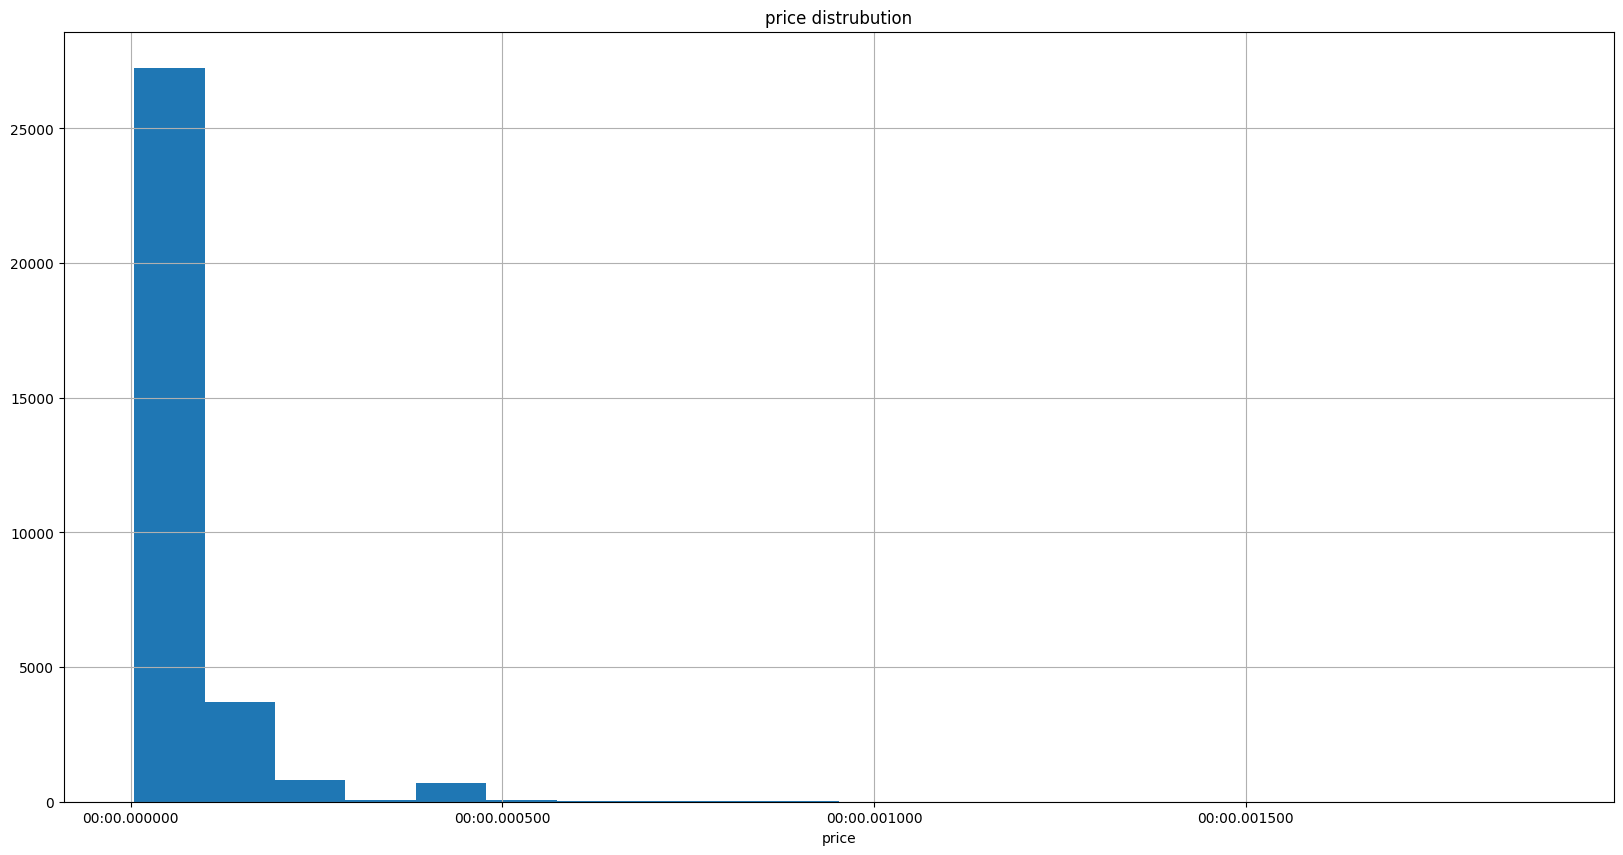

In [29]:
#visualization with pandas
import matplotlib.pyplot as plt
df['price'].hist(bins=20,figsize=(20,10))
plt.title('price distrubution')
plt.xlabel('price')

<Axes: xlabel='power', ylabel='price'>

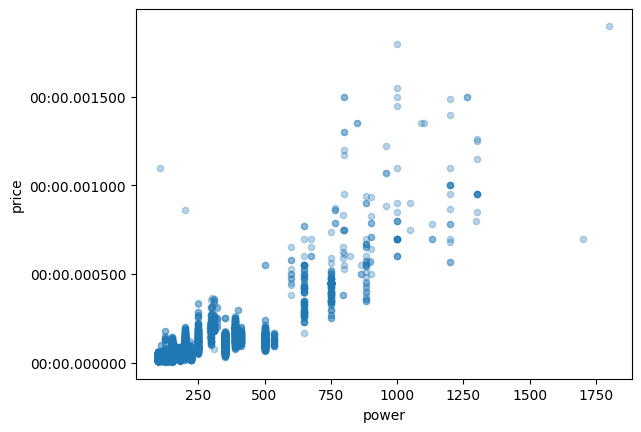

In [22]:
df.plot(kind='scatter', x='power', y='price', alpha=0.3)


<Axes: title={'center': 'kms_driven'}, xlabel='[price]'>

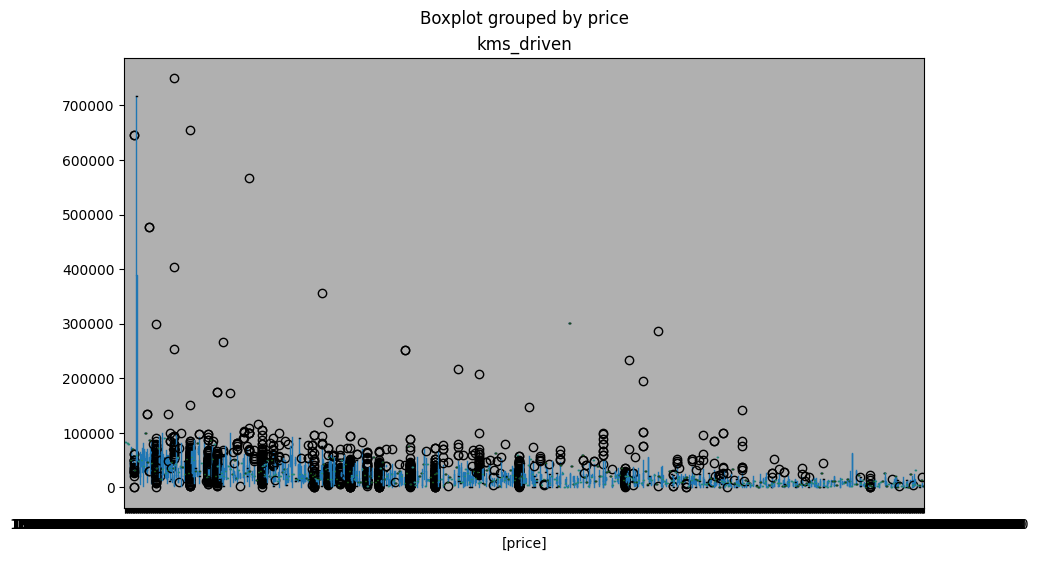

In [23]:
df[['price', 'kms_driven']].boxplot(by='price', figsize=(10,6))

In [24]:
df_dropped=df.drop(['owner','age'],axis=1)
df_dropped.head()

,bike_name,price,city,kms_driven,power,brand
0,TVS Star City Plus Dual Tone 110cc,1970-01-01 00:00:00.000035000,Ahmedabad,17654.0,110.0,TVS
1,Royal Enfield Classic 350cc,1970-01-01 00:00:00.000119900,Delhi,11000.0,350.0,Royal Enfield
2,Triumph Daytona 675R,1970-01-01 00:00:00.000600000,Delhi,110.0,675.0,Triumph
3,TVS Apache RTR 180cc,1970-01-01 00:00:00.000065000,Bangalore,16329.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,1970-01-01 00:00:00.000080000,Bangalore,10000.0,150.0,Yamaha


In [27]:
df.to_csv('processed_used_bikes.csv.csv', index=False)